In [2]:
import torch
from diffusers import FluxFillPipeline
from diffusers.utils import load_image
from PIL import Image

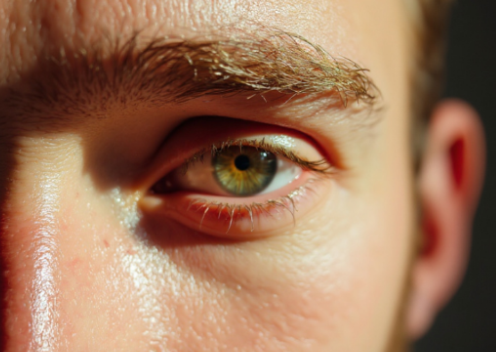

In [7]:
image = load_image("outpaint_test2.png")
image

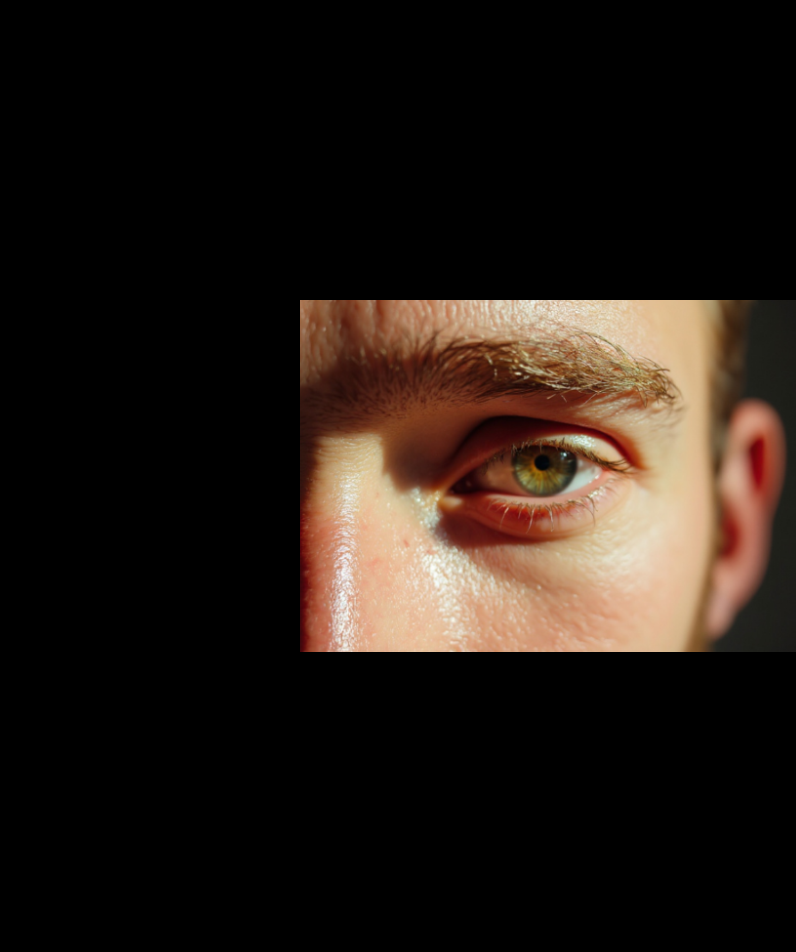

In [8]:
def create_outpaint_mask(image, top_offset, bottom_offset, left_offset, right_offset):
    width, height = image.size
    new_width = width + left_offset + right_offset
    new_height = height + top_offset + bottom_offset
    
    mask = Image.new("L", (new_width, new_height), 255)  # Create a white mask
    mask.paste(0, (left_offset, top_offset, left_offset + width, top_offset + height))  # Paste the black rectangle
    
    return mask

def create_outpaint_image(image, top_offset, bottom_offset, left_offset, right_offset):
    #Do the same as in create_outpaint_mask but instead paste image instead of black rectangle, other parts should be white
    width, height = image.size
    new_width = width + left_offset + right_offset
    new_height = height + top_offset + bottom_offset

    outpaint_image = Image.new("RGB", (new_width, new_height))
    outpaint_image.paste(image, (left_offset, top_offset))

    return outpaint_image

# Example usage
top_offset = 300
bottom_offset = 300
left_offset = 300
right_offset = 0
mask = create_outpaint_mask(image, top_offset, bottom_offset, left_offset, right_offset)
image = create_outpaint_image(image, top_offset, bottom_offset, left_offset, right_offset)
image

In [2]:
pipe = FluxFillPipeline.from_pretrained("black-forest-labs/FLUX.1-Fill-dev", torch_dtype=torch.bfloat16, revision="03216e1d673120f9467575e1e84ff1ff21f2c29f")
pipe.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


100%|██████████| 50/50 [07:32<00:00,  9.05s/it]


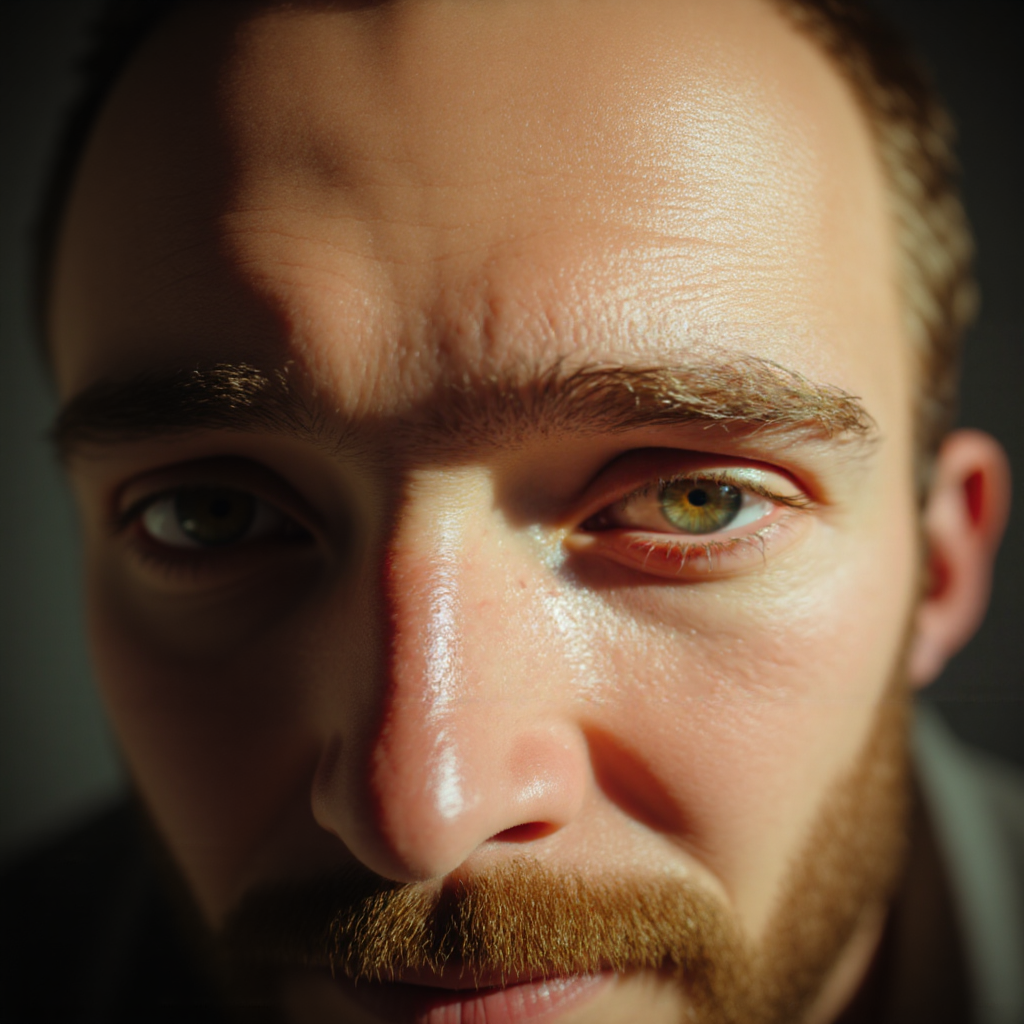

In [6]:

image = pipe(
    prompt="A face of a man",
    image=image,
    mask_image=mask,
    guidance_scale=30,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0),
).images[0]
# image.save("flux_fill.png")
image

In [5]:
image_2 = load_image("outpaint_test.png")
image_2


In [9]:
top_offset = 300
bottom_offset = 300
left_offset = 300
right_offset = 300
mask = create_outpaint_mask(image_2, top_offset, bottom_offset, left_offset, right_offset)
image_2 = create_outpaint_image(image_2, top_offset, bottom_offset, left_offset, right_offset)
image_2

In [11]:
result_2 = pipe(
    prompt="A man and a woman kissing, painting",
    image=image_2,
    mask_image=mask,
    guidance_scale=30,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0),
).images[0]
# image.save("flux_fill.png")
result_2

100%|██████████| 50/50 [07:28<00:00,  8.97s/it]
